In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
clean_loans = loans.copy()

In [5]:
clean_loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
clean_loans= clean_loans[['LoanStatus','LoanOriginalAmount', 'Term','BorrowerAPR',
             'CreditScoreRangeLower']]

In [7]:
clean_loans = clean_loans.dropna()
clean_loans.head()

,LoanStatus,LoanOriginalAmount,Term,BorrowerAPR,CreditScoreRangeLower
0,Completed,9425,36,0.16516,640.0
1,Current,10000,36,0.12016,680.0
2,Completed,3001,36,0.28269,480.0
3,Current,10000,36,0.12528,800.0
4,Current,15000,36,0.24614,680.0


In [8]:
clean_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113346 entries, 0 to 113936
Data columns (total 5 columns):
LoanStatus               113346 non-null object
LoanOriginalAmount       113346 non-null int64
Term                     113346 non-null int64
BorrowerAPR              113346 non-null float64
CreditScoreRangeLower    113346 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.2+ MB


In [9]:
clean_loans.LoanOriginalAmount.min(),clean_loans.LoanOriginalAmount.max()

(1000, 35000)

In [10]:
clean_loans.LoanOriginalAmount.value_counts().sort_index()

1000     3158
1001        7
1005        2
1010        1
1025       31
         ... 
34000       5
34679       1
34700       1
34999       3
35000     430
Name: LoanOriginalAmount, Length: 2460, dtype: int64

In [11]:
clean_loans.Term.min(),clean_loans.Term.max()

(12, 60)

In [12]:
clean_loans.Term.value_counts().sort_index()

12     1614
36    87187
60    24545
Name: Term, dtype: int64

In [13]:
clean_loans.BorrowerAPR.min(),clean_loans.BorrowerAPR.max()

(0.006529999999999999, 0.42395)

In [14]:
clean_loans.BorrowerAPR.value_counts().sort_index() 

0.00653     2
0.00864     1
0.01315     2
0.01325     1
0.01548     1
           ..
0.40482     1
0.40679    11
0.40745     4
0.41355    55
0.42395     1
Name: BorrowerAPR, Length: 6635, dtype: int64

In [15]:
#It is possible to have a near zero percent APR when a bank is financing loans for third-parties. The best
# expample of these situations is in the instance of Auto Loans, financed at extremely low rates to incentivize a purchase.

In [16]:
clean_loans.CreditScoreRangeLower.min(),clean_loans.CreditScoreRangeLower.max()

(0.0, 880.0)

In [17]:
clean_loans.CreditScoreRangeLower.value_counts().sort_index()

0.0        133
360.0        1
420.0        5
440.0       36
460.0      141
480.0      346
500.0      554
520.0     1593
540.0     1474
560.0     1357
580.0     1125
600.0     3602
620.0     4172
640.0    12199
660.0    16366
680.0    16492
700.0    15471
720.0    12923
740.0     9267
760.0     6606
780.0     4624
800.0     2644
820.0     1409
840.0      567
860.0      212
880.0       27
Name: CreditScoreRangeLower, dtype: int64

In [18]:
clean_loans = clean_loans.query('CreditScoreRangeLower > 0')

In [19]:
clean_loans.CreditScoreRangeLower.value_counts().sort_index()

360.0        1
420.0        5
440.0       36
460.0      141
480.0      346
500.0      554
520.0     1593
540.0     1474
560.0     1357
580.0     1125
600.0     3602
620.0     4172
640.0    12199
660.0    16366
680.0    16492
700.0    15471
720.0    12923
740.0     9267
760.0     6606
780.0     4624
800.0     2644
820.0     1409
840.0      567
860.0      212
880.0       27
Name: CreditScoreRangeLower, dtype: int64

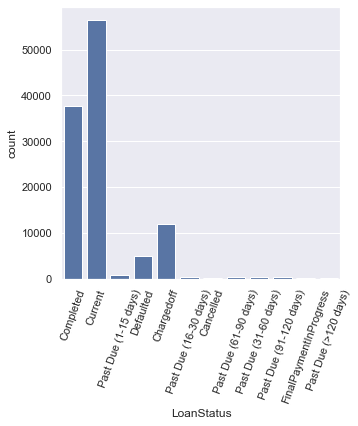

In [20]:
plt.figure(figsize=[5, 5]);
sns.countplot(x ='LoanStatus', data=clean_loans, color = sns.color_palette()[0]);
plt.xticks(rotation=70);


In [21]:
badloans = clean_loans.query("LoanStatus == 'Defaulted' or LoanStatus == 'Chargedoff' ")
badloans= badloans.drop(columns={'LoanStatus'})
badloans

,LoanOriginalAmount,Term,BorrowerAPR,CreditScoreRangeLower
15,4000,36,0.35797,700.0
17,10000,36,0.13202,760.0
23,2000,36,0.28032,680.0
42,1500,36,0.30300,520.0
57,2000,36,0.29394,720.0
...,...,...,...,...
113904,10000,36,0.24753,640.0
113905,4000,36,0.35797,740.0
113914,3000,36,0.25757,520.0
113918,7000,36,0.12201,740.0


In [22]:
badloans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16742 entries, 15 to 113926
Data columns (total 4 columns):
LoanOriginalAmount       16742 non-null int64
Term                     16742 non-null int64
BorrowerAPR              16742 non-null float64
CreditScoreRangeLower    16742 non-null float64
dtypes: float64(2), int64(2)
memory usage: 654.0 KB


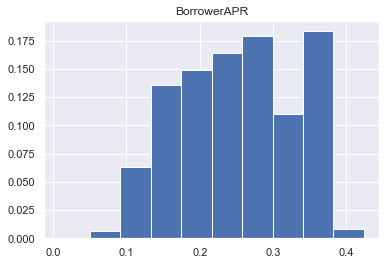

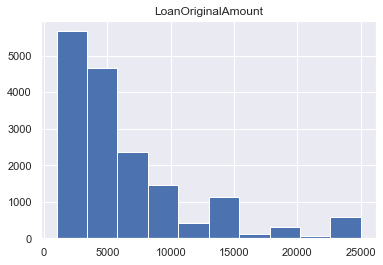

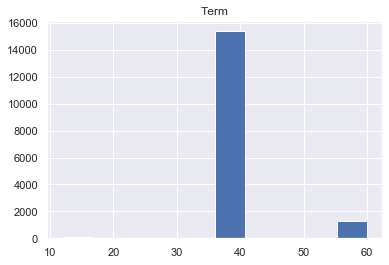

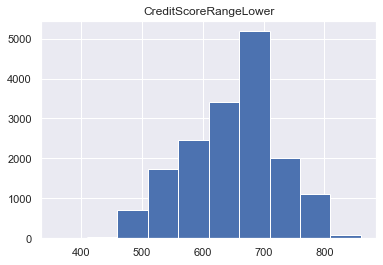

In [23]:
weights_df=np.ones(len(badloans)) / len(badloans)


badloans.hist('BorrowerAPR', weights=weights_df,density=False)
badloans.hist('LoanOriginalAmount');
badloans.hist('Term');
badloans.hist('CreditScoreRangeLower');

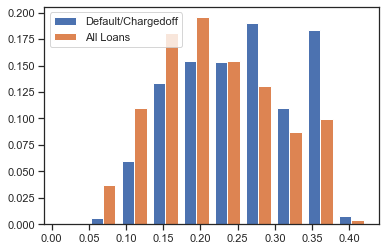

In [37]:
weights_df=np.ones(len(badloans)) / len(badloans)
weights_cl=np.ones(len(clean_loans)) / len(clean_loans)


x = badloans['BorrowerAPR']
y = clean_loans['BorrowerAPR']
plt.hist([x, y], label=['Default/Chargedoff', 'All Loans'], bins=10 ,weights=[weights_df,weights_cl])
plt.legend(loc='upper left');

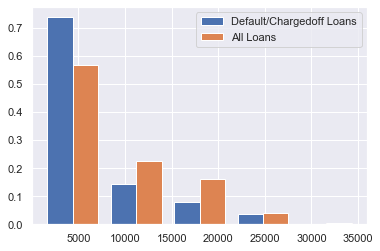

In [25]:
weights_df=np.ones(len(badloans)) / len(badloans)
weights_cl=np.ones(len(clean_loans)) / len(clean_loans)

x = badloans['LoanOriginalAmount']
y = clean_loans['LoanOriginalAmount']
plt.hist([x, y], label=['Default/Chargedoff Loans', 'All Loans'], bins=5, weights=[weights_df,weights_cl])
plt.legend(loc='upper right');

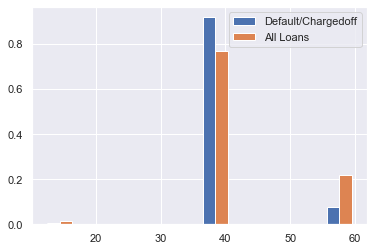

In [26]:
x = badloans['Term']
y = clean_loans['Term']
plt.hist([x, y], label=['Default/Chargedoff', 'All Loans'],  bins=10, weights=[weights_df,weights_cl])
plt.legend(loc='upper right');

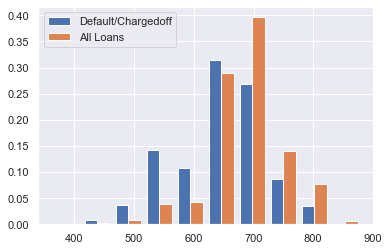

In [27]:
x = badloans['CreditScoreRangeLower']
y = clean_loans['CreditScoreRangeLower']
plt.hist([x, y], label=['Default/Chargedoff', 'All Loans'], bins=10, weights=[weights_df,weights_cl])
plt.legend(loc='upper left');

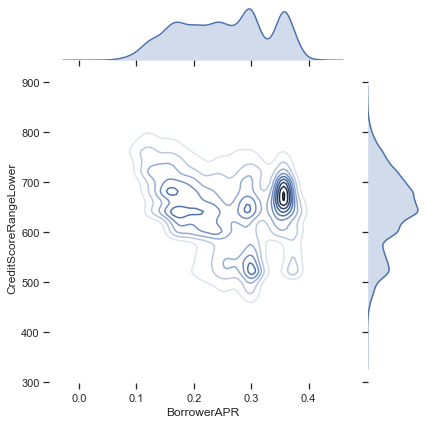

In [28]:
#Create a joint plot for BorrowerAPR and CreditScore
sns.set_style('ticks')
sns.jointplot(x='BorrowerAPR',y='CreditScoreRangeLower',data=badloans,
              kind='kde', shade=False)
sns.despine(left=True, bottom=True);

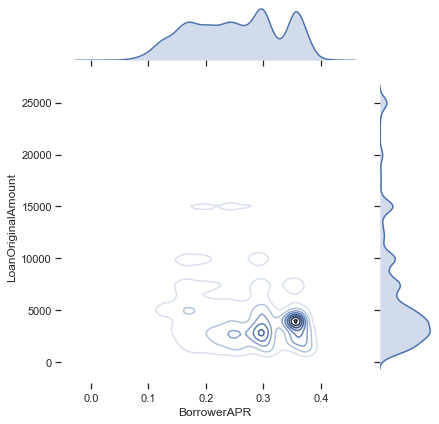

In [29]:
sns.set_style('ticks')
sns.jointplot(x='BorrowerAPR',y='LoanOriginalAmount',data=badloans,
              kind='kde', shade=False)
sns.despine(left=True, bottom=True);

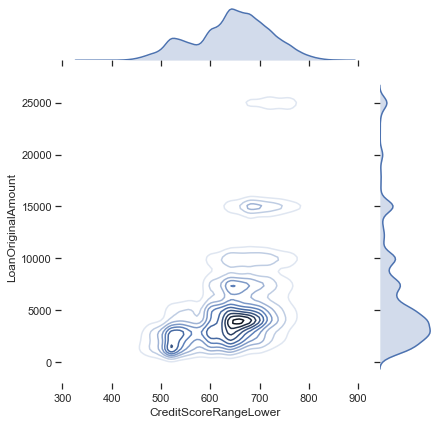

In [41]:
sns.set_style('ticks')
sns.jointplot(x='CreditScoreRangeLower',y='LoanOriginalAmount',data=badloans,
              kind='kde',shade=False)
sns.despine(left=True, bottom=True);


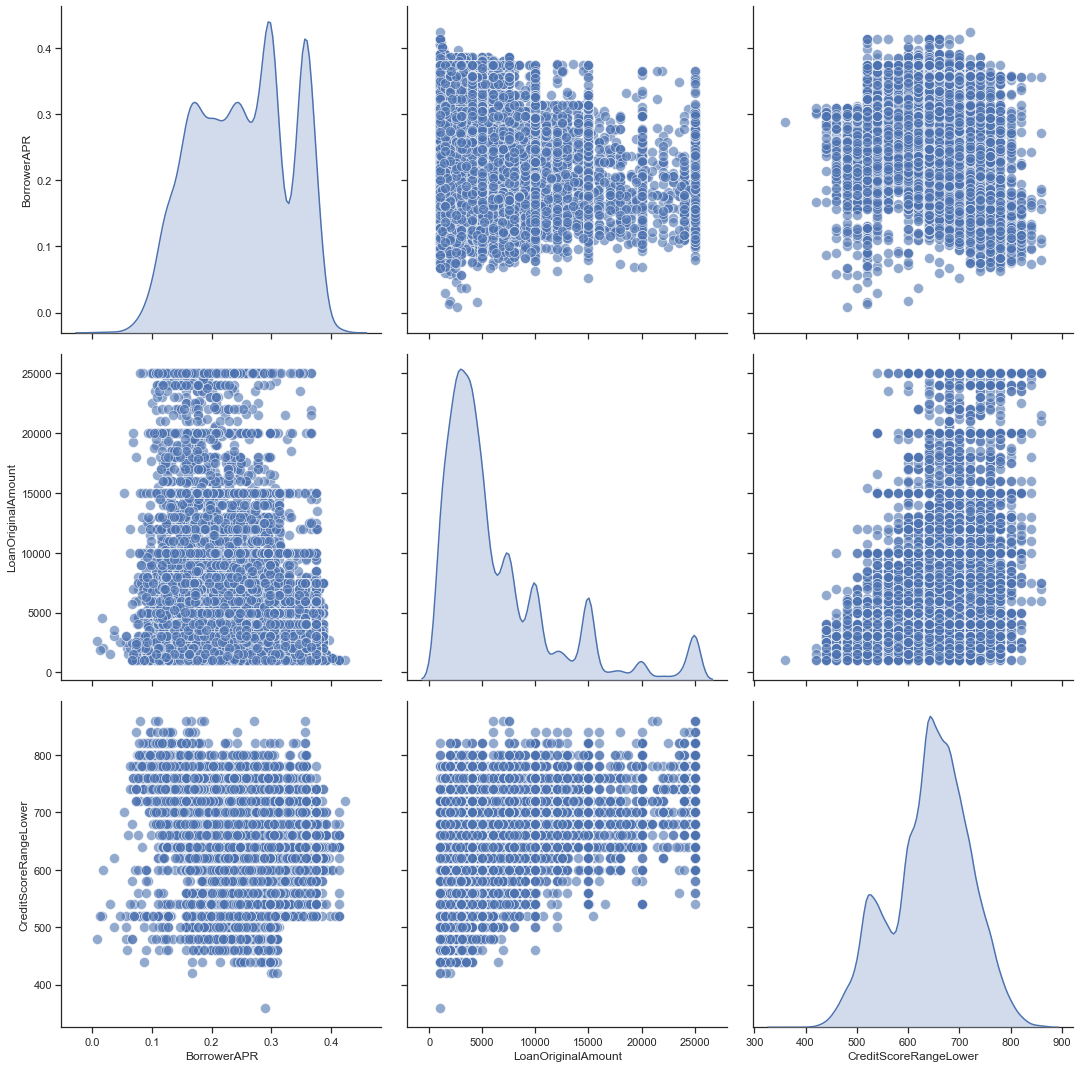

In [44]:
sns.pairplot(badloans,diag_kind = 'kde',vars = ['BorrowerAPR', 'LoanOriginalAmount', 'CreditScoreRangeLower'],palette="Set2",
            plot_kws = {'alpha': 0.6, 's': 100 ,'edgecolor': 'white'}, height=5)

In [42]:
loan_category = clean_loans.query("LoanStatus == 'Completed' or LoanStatus == 'Chargedoff' or LoanStatus == 'Defaulted'")
loan_category.LoanStatus.value_counts()

Completed     37619
Chargedoff    11909
Defaulted      4833
Name: LoanStatus, dtype: int64

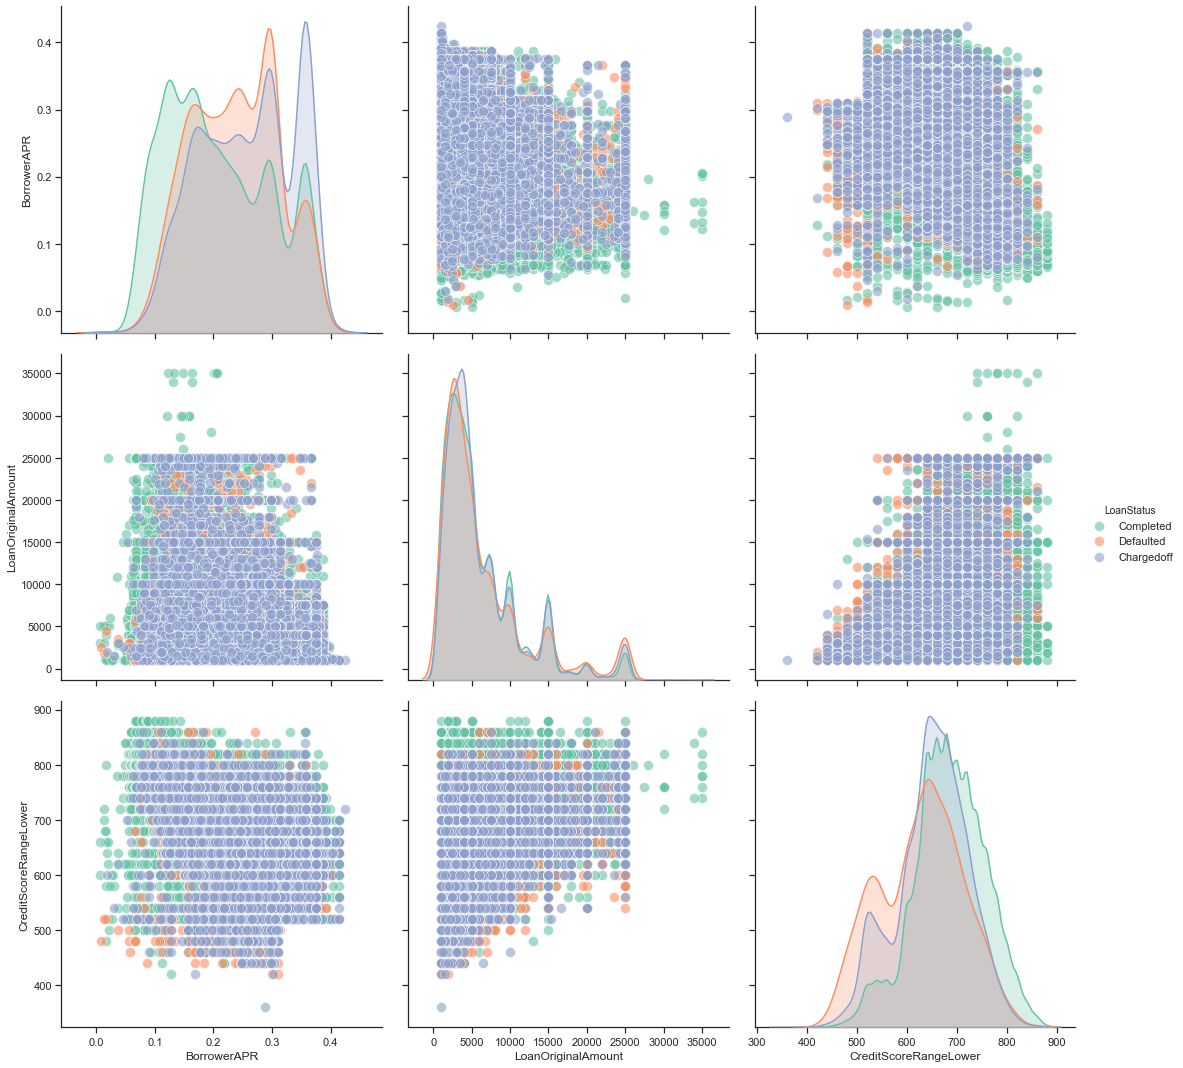

In [36]:
sns.pairplot(loan_category,vars = ['BorrowerAPR', 'LoanOriginalAmount', 'CreditScoreRangeLower'], 
                  hue="LoanStatus", palette="Set2", plot_kws = {'alpha': 0.6, 's': 100 ,'edgecolor': 'white'}, height=5)
